In [1]:
%load_ext autoreload
%autoreload 2
import leg_joint as lj
import IPython.core.display as disp
%matplotlib inline

# The elementary cell


The architecture of the epithelium model consists of an **oriented graph** containing

* two types of vertices: 

  * The **cells** themselves
  * The **appical junctions vertices** 

* and two types of edges:

 * The junction edges, structuring the apical surface of the
    epithelium and oriented randomly from one junction vertex to the other

 * The cell to junction edges linking one cell to its
    neighbouring junction vertices, oriented from the cell vertex to the junctions



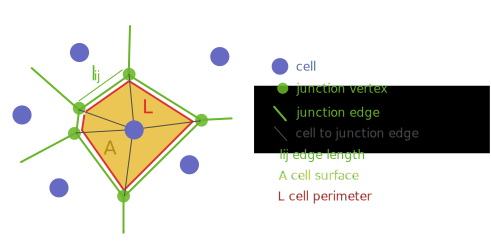

In [2]:
disp.SVG(lj.data.get_image('one_cell.svg'))

## 3D geometry


The position of the vertices is given in two 3D coordinate systems, cartesian $(x, y, z)$ and cylindrical $(\rho, \theta, z)$. 

Initialy, the vertices are distributed over a cylinder centered around the $z$ axis. The volume of a cell is computed as the sum of the area of each triangle formed by a junction edge and two cell-to-junction edges times the height of the cell center. Of course this is an approximation:
$$
V_\alpha = \sum_{i,j} A_{\alpha ij} h_\alpha c_{\alpha i} c_{\alpha j} c_{ij}
$$
with $c_{uv} = 1$ if vertices $u$ and $v$ are connected and 0 otherwise.  
and $A_{\alpha ij} = || \mathbf{r}_{\alpha i} \times \mathbf{ r}_{\alpha j} || / 2 $

### Interactions at the apical junctions

Three interactions are considered at the epithelium:

-   The line tension between two junction vertices, with associated
    energy $E^t_{ij} = \Lambda \ell_{ij}$, where $\ell_{ij}$ is the
    length of the junction edge between vertices $i$ and $j$.

-   The contraction of a cell, with associated energy
    $E^c_\alpha = \Gamma L_\alpha^2$, where $L_\alpha$ is the perimeter
    of the cell $\alpha$.

-   The volume elasticity $E^v_\alpha = K_v (V_\alpha - V_0)^2$, where
    $V_\alpha$ is the volume of the cell $\alpha$.

The total energy is given by:

$$
E = \sum_\alpha (E^v_\alpha + E^c_\alpha)
+ \sum_{i \leftrightarrow j} E^t_{ij}
$$

    

### Coordinate system

In order to have a workable geometric representation of the leg, we discribe it as having a cylindrical symmetry. The reference frame is thus the one bellow:

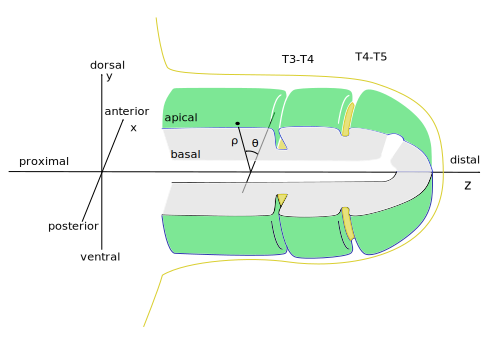

In [3]:
disp.SVG(lj.data.get_image('geometrie.svg'))

# Quickstart with the `leg_joint` module

## Exemple of a simulated epithelium


We show below a view of an epithelium. The static view is stored as a graphXML file parsed by graph_tool, and passed to instenciate an `Epithelium` container class. We won't focus on the implementation details for now.

In [4]:
eptm = lj.Epithelium(identifier='tuto')
print(eptm)

2015-03-28 12:16:35,303 -leg_joint.epithelium.epithelium -__init__ -- INFO -Instanciating epithelium tuto
2015-03-28 12:16:35,304 -leg_joint.epithelium.epithelium -__init__ -- INFO -Created new graph
2015-03-28 12:16:35,397 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial cells
2015-03-28 12:16:35,399 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial junctions
2015-03-28 12:16:35,447 -leg_joint.epithelium.epithelium -__init__ -- INFO -Update geometry


<Epithelium with 56 cells and 152 junction edges at 0x7fce10c22ac8>
Identifier : tuto_2015-03-28T11_16_35
Directory : /tmp/tuto


### The `graph` attribute

The `etm.graph` object is a graph-tool `Graph` instance, so all the associated methods and attributes are accessible, please refer to [graph-tool thourough documentation](http://graph-tool.skewed.de/static/doc/index.html) for details. 

All the variables associated with the apical junction network are stored as graph_tool `PropertyMaps`. 

In [5]:
eptm.graph.list_properties()

vol_elasticity (vertex)  (type: double)
rho            (vertex)  (type: double)
is_cell_vert   (vertex)  (type: bool)
contractility  (vertex)  (type: double)
area           (vertex)  (type: double)
vol            (vertex)  (type: double)
contractilities (vertex)  (type: double)
radial_tensions (vertex)  (type: double)
x              (vertex)  (type: double)
num_sides      (vertex)  (type: double)
theta          (vertex)  (type: double)
prefered_vol   (vertex)  (type: double)
perimeter      (vertex)  (type: double)
z              (vertex)  (type: double)
vol_elasticities (vertex)  (type: double)
y              (vertex)  (type: double)
is_active_vert (vertex)  (type: bool)
height         (vertex)  (type: double)
is_alive       (vertex)  (type: bool)
dz             (edge)    (type: double)
line_tensions  (edge)    (type: double)
dy             (edge)    (type: double)
is_junction_edge (edge)    (type: bool)
dx             (edge)    (type: double)
line_tension   (edge)    (type: double)
ed

`Epithelium` objects have an attribute `paths` with the path to the epithelium directory, where data will be stored.

for reference, while refactoring, here are the previous properties

```
ixs            (vertex)  (type: double)
grad_zed       (vertex)  (type: double)
prefered_vol   (vertex)  (type: double)
vols           (vertex)  (type: double)
vol_elasticities (vertex)  (type: double)
perimeters     (vertex)  (type: double)
is_local_vert  (vertex)  (type: bool)
radial_tensions (vertex)  (type: double)
thetas         (vertex)  (type: double)
zeds           (vertex)  (type: double)
is_alive       (vertex)  (type: bool)
grad_wy        (vertex)  (type: double)
rhos           (vertex)  (type: double)
volume_grad_apical (vertex)  (type: double)
grad_ix        (vertex)  (type: double)
contractilities (vertex)  (type: double)
contractile_grad (vertex)  (type: double)
volume_grad    (vertex)  (type: double)
is_active_vert (vertex)  (type: bool)
ages           (vertex)  (type: int32_t)
grad_radial    (vertex)  (type: double)
areas          (vertex)  (type: double)
volume_grad_radial (vertex)  (type: double)
elastic_grad   (vertex)  (type: double)
is_cell_vert   (vertex)  (type: bool)
grad_sigma     (vertex)  (type: double)
wys            (vertex)  (type: double)
sigmas         (vertex)  (type: double)
volume_grad_cell (vertex)  (type: vector<double>)
dwys           (edge)    (type: double)
dsigmas        (edge)    (type: double)
u_dzeds        (edge)    (type: double)
is_local_edge  (edge)    (type: bool)
drhos          (edge)    (type: double)
u_dwys         (edge)    (type: double)
is_junction_edge (edge)    (type: bool)
at_boundary    (edge)    (type: bool)
is_ctoj_edge   (edge)    (type: bool)
edge_lengths   (edge)    (type: double)
dthetas        (edge)    (type: double)
u_dixs         (edge)    (type: double)
is_new_edge    (edge)    (type: bool)
dixs           (edge)    (type: double)
line_tensions  (edge)    (type: double)
u_drhos        (edge)    (type: double)
dzeds          (edge)    (type: double)
u_dsigmas      (edge)    (type: double)
is_active_edge (edge)    (type: bool)
```

In [6]:
eptm.paths

{'hdf': '/tmp/tuto/eptm_tuto_2015-03-28T11_16_35.h5',
 'json': '/tmp/tuto/params_tuto_2015-03-28T11_16_35.json',
 'log': '/tmp/tuto/tuto_2015-03-28T11_16_35.log',
 'pdf': '/tmp/tuto/pdf',
 'png': '/tmp/tuto/png',
 'root': '/tmp/tuto',
 'svg': '/tmp/tuto/svg',
 'xml': '/tmp/tuto/xml'}

There are various ways to look at an epithelium. The default one is just called `draw`, and produces a 3D and a 2D view. Color code corresponds to the depth of the edge.

In [14]:
import os
output3d = os.path.join(eptm.paths['png'], 'tissue_3d.png')



lj.draw.graph_representation.epithelium_draw(eptm, output3d=output3d)

2015-03-28 12:33:53,161 -leg_joint.epithelium.epithelium -epithelium_draw -- INFO -saved tissue to /tmp/tuto/png/tissue_3d.png


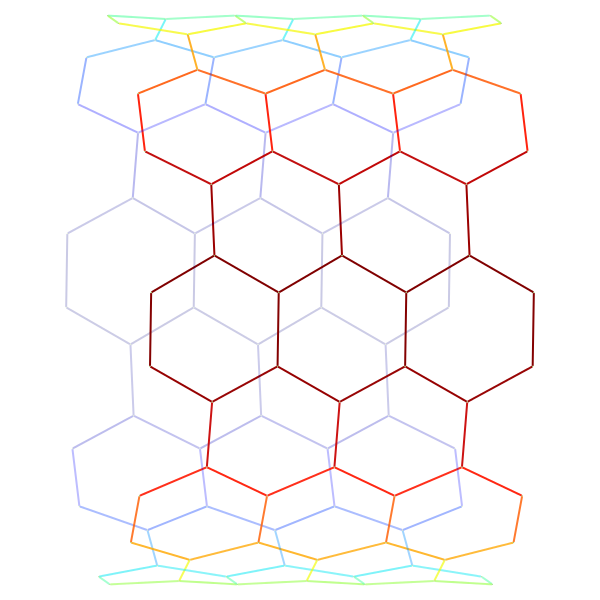

In [15]:
disp.Image(filename=output3d)


## Comparison with Farhadifar et al. geometry


For the epithelium above, we can look at the number of neighbors for each cells, and the dependency of the cells' areas on this number. This is what we compute in the cell bellow.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib-1.4.x-py3.4-linux-x86_64.egg/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


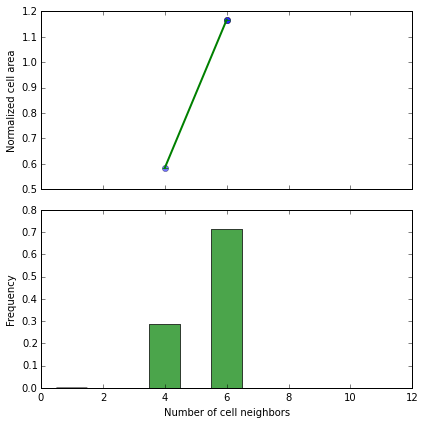

In [21]:
eptm.graph.set_vertex_filter(None)

## The number of side is equal to the number of junction vertices
## thus to the number of out neighbors of each cell
num_sides = eptm.graph.degree_property_map('out')

## Filter living cells
live_cells = eptm.is_alive.copy()
live_cells.a *= eptm.is_cell_vert.a
eptm.graph.set_vertex_filter(live_cells)

## Computing nomrmalized area
normed_areas = eptm.area.fa / eptm.area.fa.mean()

## Getting the numbr of sides only for living cells
num_sides = np.asarray(num_sides.fa)
u_num_sides = np.unique(num_sides)

## Plotting it all
avg_areas = np.zeros(u_num_sides.size)
stm_areas = np.zeros(u_num_sides.size)
bins, n_cells = np.histogram(num_sides, bins=11, range=(0, 11))

for n, n_sides in enumerate(u_num_sides):
    avg_areas[n] = normed_areas[num_sides == n_sides].mean()
    stm_areas[n] = normed_areas[num_sides == n_sides].std() / np.sqrt(n_cells[np.int(n_sides)])
        
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
ax1.plot(num_sides, normed_areas, 'o', alpha=0.05)    
ax1.errorbar(u_num_sides, avg_areas, yerr=stm_areas, lw=2, elinewidth=2)
ax1.set_xlim(0, 12)


ax2.hist(num_sides, bins=11, range=(0.5, 11.5),
         normed=True, color='g', alpha=0.7)
ax2.set_xlim(0, 12)
eptm.graph.set_vertex_filter(None)
ax2.set_xlabel('Number of cell neighbors')
ax2.set_ylabel('Frequency')
ax1.set_ylabel('Normalized cell area')
plt.draw()

fig.savefig(lj.data.get_image('tissue_geometry.svg'))
